# Random Forest (Bosques Aleatorios)

**Concepto:** Random Forest es un algoritmo de aprendizaje supervisado que utiliza el método de **Ensamble** (Ensemble Learning). En lugar de confiar en un solo árbol de decisión (que puede ser propenso al overfitting), Random Forest crea un "bosque" de muchos árboles y combina sus predicciones.

**¿Cómo funciona?**
1.  **Bagging (Bootstrap Aggregating):** Cada árbol se entrena con una muestra aleatoria de los datos (con reemplazo).
2.  **Selección Aleatoria de Características:** En cada división de un nodo, solo se considera un subconjunto aleatorio de características.
3.  **Votación:** Para clasificar, cada árbol "vota" por una clase y la clase con más votos gana.

**Ventajas:**
*   Reduce el overfitting (varianza) comparado con un solo árbol.
*   Es muy preciso y robusto.
*   Maneja bien grandes conjuntos de datos y variables.

**Ejemplo 1: Iris Dataset**
Clasificación básica de flores usando un bosque de 100 árboles.

Precisión del Bosque Aleatorio: 1.0

Reglas del primer árbol del Bosque Aleatorio:
|--- petal width (cm) <= 0.70
|   |--- class: 0.0
|--- petal width (cm) >  0.70
|   |--- petal width (cm) <= 1.55
|   |   |--- petal length (cm) <= 4.95
|   |   |   |--- class: 1.0
|   |   |--- petal length (cm) >  4.95
|   |   |   |--- class: 2.0
|   |--- petal width (cm) >  1.55
|   |   |--- petal width (cm) <= 1.85
|   |   |   |--- sepal width (cm) <= 3.15
|   |   |   |   |--- petal width (cm) <= 1.75
|   |   |   |   |   |--- sepal length (cm) <= 5.80
|   |   |   |   |   |   |--- class: 2.0
|   |   |   |   |   |--- sepal length (cm) >  5.80
|   |   |   |   |   |   |--- petal length (cm) <= 5.40
|   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |--- petal length (cm) >  5.40
|   |   |   |   |   |   |   |--- class: 2.0
|   |   |   |   |--- petal width (cm) >  1.75
|   |   |   |   |   |--- class: 2.0
|   |   |   |--- sepal width (cm) >  3.15
|   |   |   |   |--- class: 1.0
|   |   |--- 

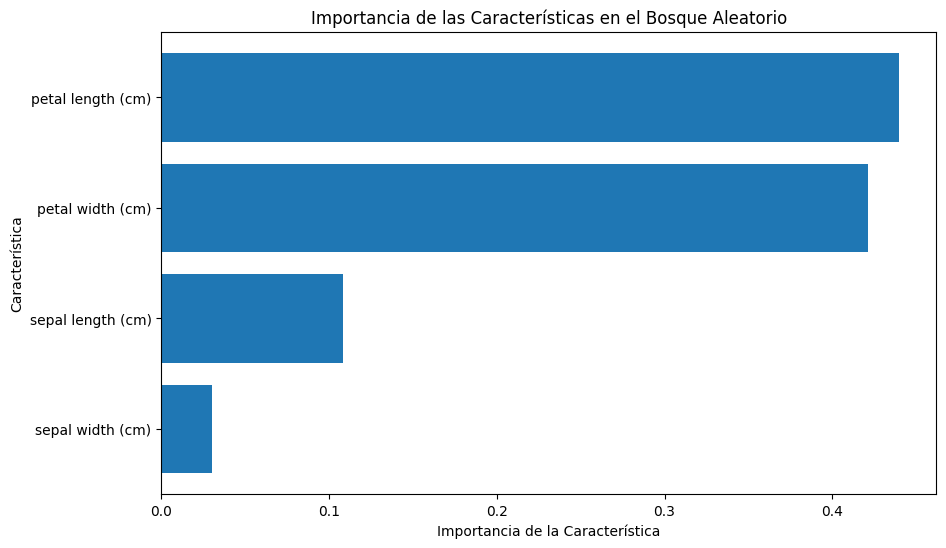

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import export_text

# Cargar el conjunto de datos Iris
iris = load_iris()
X, y = iris.data, iris.target

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el clasificador de Bosque Aleatorio
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = rf_classifier.predict(X_test)

# Evaluar la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del Bosque Aleatorio: {accuracy}')

# Visualizar un árbol individual del Bosque Aleatorio (opcional)
single_tree = rf_classifier.estimators_[0]
tree_rules = export_text(single_tree, feature_names=iris.feature_names)
print(f'\nReglas del primer árbol del Bosque Aleatorio:\n{tree_rules}')

# Visualizar la importancia de las características
feature_importance = rf_classifier.feature_importances_
sorted_idx = np.argsort(feature_importance)

# Crear un gráfico de barras para mostrar la importancia de las características
plt.figure(figsize=(10, 6))
plt.barh(range(X.shape[1]), feature_importance[sorted_idx], align='center')
plt.yticks(range(X.shape[1]), np.array(iris.feature_names)[sorted_idx])
plt.xlabel('Importancia de la Característica')
plt.ylabel('Característica')
plt.title('Importancia de las Características en el Bosque Aleatorio')
plt.show()


## 2. Clasificación de Autos (Car Evaluation)

**Objetivo:** Predecir la aceptabilidad de un auto basándose en sus características técnicas.

**Diferencia con un solo Árbol:**
En el notebook de Árboles de Decisión usamos un solo modelo. Aquí usaremos `RandomForestClassifier`. Observaremos cómo el modelo maneja las variables categóricas y si mejora la robustez de las predicciones.

**Proceso:**
1.  **Carga:** Descarga desde Kaggle.
2.  **Preprocesamiento:** Encoding de variables categóricas y balanceo de clases.
3.  **GridSearch:** Buscaremos no solo la profundidad (`max_depth`), sino también el número de árboles (`n_estimators`).

In [15]:
# --- 1. CARGA DE DATOS (KAGGLE) ---
# Instalamos la librería de Kaggle si no está presente
# %pip install kagglehub[pandas-datasets]

import kagglehub
from kagglehub import KaggleDatasetAdapter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', context='notebook')

# Descargamos el dataset
print("Descargando dataset desde Kaggle...")
path = kagglehub.dataset_download("elikplim/car-evaluation-data-set")
print(f"Dataset descargado en: {path}")

# Cargamos el CSV
# El dataset original no tiene encabezados, así que los definimos manualmente
df_car = pd.read_csv(f'{path}/car_evaluation.csv', header=None)

columns_names = ['price','maint','doors','persons','lug_boot','safety','Class']
df_car.columns = columns_names

print("\n--- Primeras filas del dataset ---")
display(df_car.head())

print("\n--- Información del dataset ---")
df_car.info()

Descargando dataset desde Kaggle...
Using Colab cache for faster access to the 'car-evaluation-data-set' dataset.
Dataset descargado en: /kaggle/input/car-evaluation-data-set

--- Primeras filas del dataset ---
Using Colab cache for faster access to the 'car-evaluation-data-set' dataset.
Dataset descargado en: /kaggle/input/car-evaluation-data-set

--- Primeras filas del dataset ---


,price,maint,doors,persons,lug_boot,safety,Class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc



--- Información del dataset ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   price     1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   Class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   price     1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   Class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB
        PRICE
       Freq[N]  Prop[%]
price                  
vhigh      432     0.25
high       432     0.25
med        432     0.25
low        432     0.25
***********************
        MAINT
       Freq[N]  Prop[%]
maint                  
vhigh      432     0.25
high       432     0.25
med        432     0.25
low        432     0.25
***********************
        DOORS
       Freq[N]  Prop[%]
doors                  
2          432     0.25
3          432     0.25
4          432     0.25
5more      43

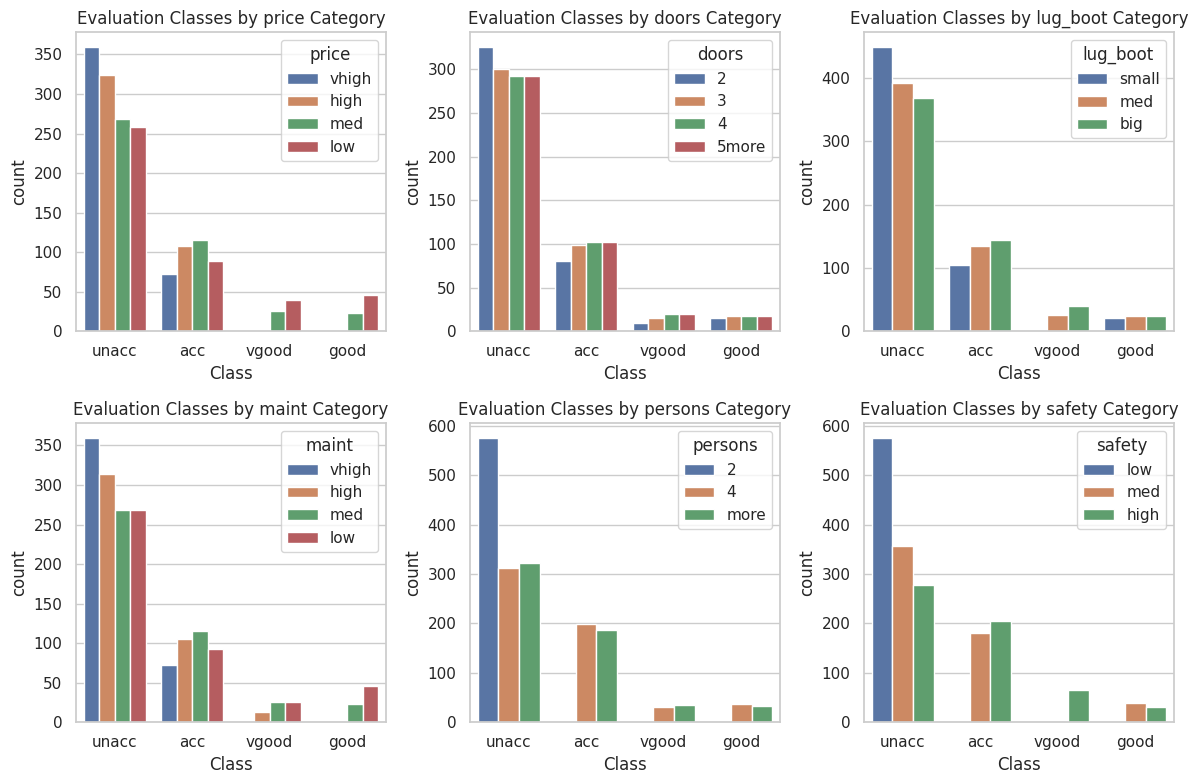

X: (182, 6) (78, 6)
y: (182,) (78,)
X: (182, 6) (78, 6)
y: (182,) (78,)
Mejores hiperparámetros encontrados:
{'criterion': 'gini', 'max_depth': 5}
Mejor puntuación de validación cruzada:
0.8295321637426902
El accuracy en train es: 0.7307692307692307
El accuracy en test es: 0.8461538461538461
              precision    recall  f1-score   support

         acc       0.77      0.62      0.69        16
        good       0.67      0.52      0.59        23
       unacc       1.00      0.80      0.89        20
       vgood       0.61      1.00      0.76        19

    accuracy                           0.73        78
   macro avg       0.76      0.74      0.73        78
weighted avg       0.76      0.73      0.73        78

Mejores hiperparámetros encontrados:
{'criterion': 'gini', 'max_depth': 5}
Mejor puntuación de validación cruzada:
0.8295321637426902
El accuracy en train es: 0.7307692307692307
El accuracy en test es: 0.8461538461538461
              precision    recall  f1-score   suppo

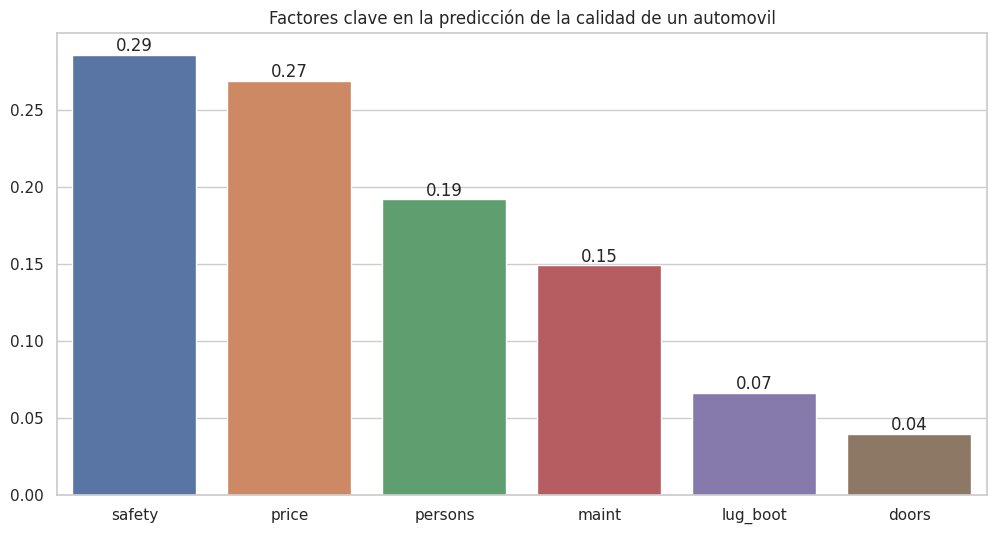

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


['vgood']


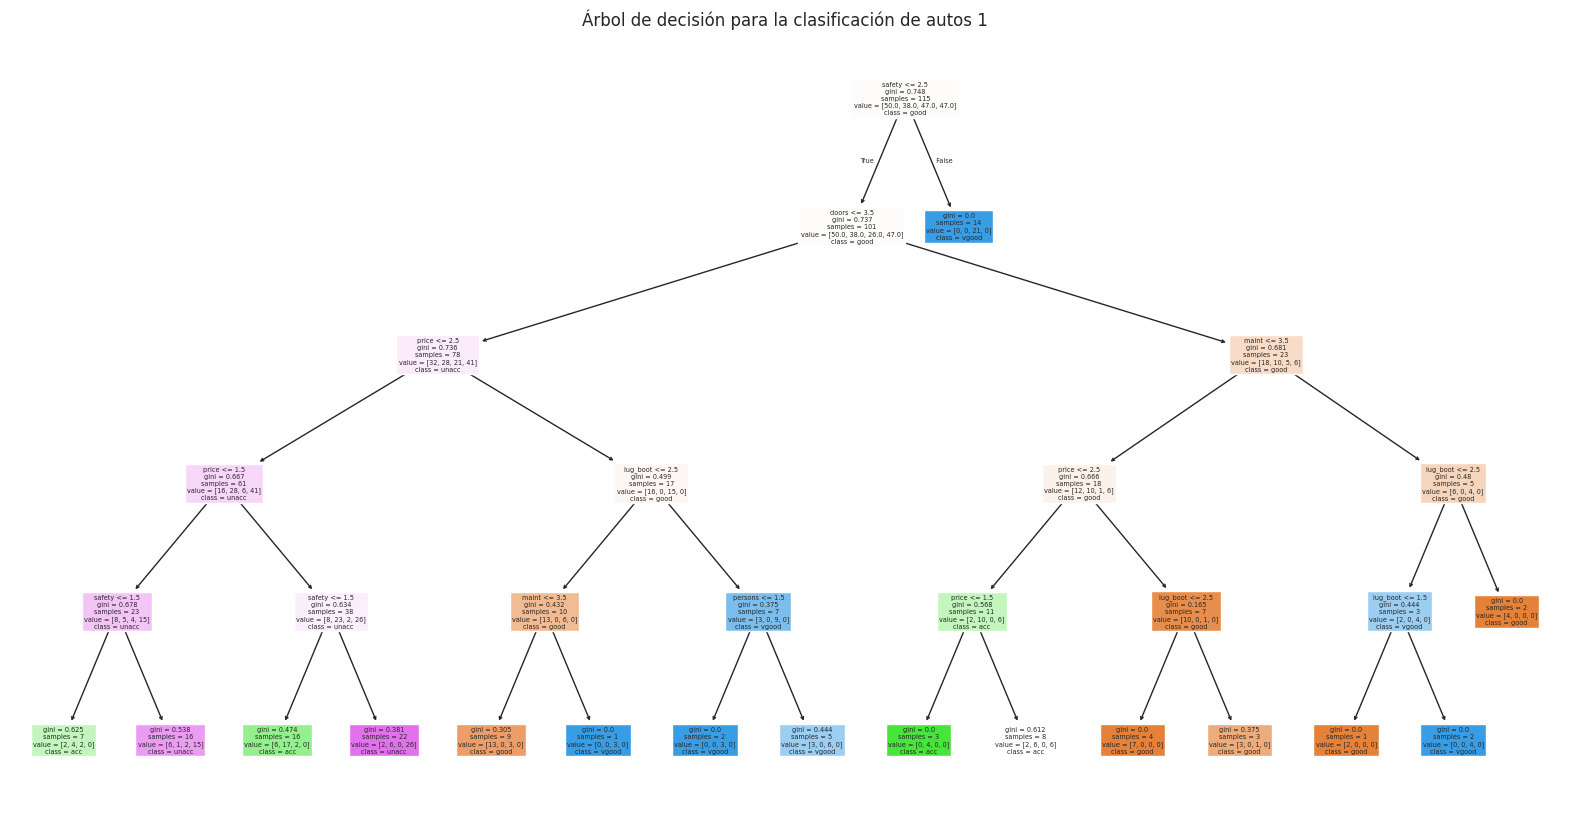

In [16]:

df_car.info()

# Vereificamos valores missings
df_car.isnull().sum()

#datos duplicados
df_car.drop_duplicates()

#manejo de datos nulos
df_car.isnull().sum()

# Funcion conteo y proporcion de datos
def dist(df,target):
    count= df[target].value_counts(normalize=False)
    prop = df[target].value_counts(normalize=True)

    dist = pd.DataFrame({'Freq[N]':count,'Prop[%]':prop.round(3)})
    return dist

    # Ver el conteo y la proporción de Class 
for i in columns_names:
    print(' '*7,i.upper())
    print(dist(df_car,i))
    print("*"*23)


# Graficamos la variable Class separada por los distintos atributos
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))

for i, variable in enumerate(columns_names[:-1]):
    row = i % 2
    col = i // 2
    sns.countplot(data=df_car, x='Class',hue=variable, ax=axes[row][col])
    axes[row][col].set_title(f"Evaluation Classes by {variable} Category")

plt.tight_layout()
plt.show()

from imblearn.under_sampling import RandomUnderSampler

undersample = RandomUnderSampler(random_state=42)

# Separamos datos por X e Y
X_car = df_car.drop('Class',axis=1)
y_car = df_car.Class

# Se realiza el undersampling
X_car, y_car = undersample.fit_resample(X_car,y_car)

!pip install category_encoders  # Install the missing library
import category_encoders as ce  # Now you can import the library

encoder = ce.OrdinalEncoder(cols=columns_names[:-1])

X_car = encoder.fit_transform(X_car)

X_car.head()

X_car.dtypes

from sklearn.model_selection import train_test_split

X_train_car, X_test_car, y_train_car, y_test_car = train_test_split(X_car,y_car,test_size=0.3, random_state=42)

print('X:',X_train_car.shape, X_test_car.shape)
print('y:',y_train_car.shape, y_test_car.shape)




from sklearn.ensemble import RandomForestClassifier  # Import from the correct module

# Instancia del modelo
tree_car = RandomForestClassifier(random_state=42)

from sklearn.model_selection import GridSearchCV

# parametros del decision tree
param_grid = {'criterion': ['gini', 'entropy'], 'max_depth': [2, 3, 4, 5]}

# Realizar la búsqueda de hiperparámetros utilizando GridSearchCV
grid_search = GridSearchCV(tree_car, param_grid=param_grid, cv=10, return_train_score=True)
grid_search.fit(X_train_car, y_train_car)

# Imprimir los resultados
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)
print("Mejor puntuación de validación cruzada:")
print(grid_search.best_score_)

# Modelo decision tree con parametros optimizados
best_tree_car = grid_search.best_estimator_

# Predecimos Y
y_train_pred_tree_car = best_tree_car.predict(X_train_car)
y_test_pred_tree_car = best_tree_car.predict(X_test_car)

from sklearn.metrics import accuracy_score, classification_report

# Calculo el accuract en train 
train_acc = accuracy_score(y_true=y_test_car,y_pred=y_test_pred_tree_car)
# Calculo el accuract en test 
test_acc  = accuracy_score(y_true=y_train_car,y_pred=y_train_pred_tree_car)

print("El accuracy en train es:",train_acc)
print("El accuracy en test es:",test_acc)

print(classification_report(y_test_car,y_test_pred_tree_car))

feature_scores_car = pd.DataFrame(pd.Series(best_tree_car.feature_importances_, index=X_train_car.columns).sort_values(ascending=False)).T
plt.figure(figsize=(12,6))
sns.barplot(data=feature_scores_car)

for index, value in enumerate(feature_scores_car.values.flatten()):
    plt.annotate(f'{value:.2f}', xy=(index, value), ha='center', va='bottom')


plt.title("Factores clave en la predicción de la calidad de un automovil")
plt.show()
pd.DataFrame(feature_scores_car.T)


W=[1,1,2,1,1,2]
W_Test=best_tree_car.predict([W])
print(W_Test)

#Graficar el árbol
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
# Asegúrate de que 'best_tree_car' sea un solo árbol de decisión, no un bosque
if hasattr(best_tree_car, 'estimators_'):
    best_tree_car = best_tree_car.estimators_[1]  # Tomamos un solo árbol del bosque
plt.figure(figsize=(20,10))
plot_tree(best_tree_car, feature_names=X_train_car.columns, class_names=y_train_car.unique(), filled=True)
plt.title(f"Árbol de decisión para la clasificación de autos {1}" )
plt.show()

## 3. Predicción de Fuga de Clientes (Telco Churn)

**Contexto:** El "Churn" (tasa de cancelación) es una métrica crítica para las empresas de suscripción. Predecir qué clientes tienen probabilidad de irse permite tomar acciones preventivas (ofertas, soporte, etc.).

**Desafíos:**
*   **Datos Desbalanceados:** La mayoría de los clientes se quedan, lo que dificulta detectar a los que se van.
*   **Variables Mixtas:** Combinación de contratos, métodos de pago (categóricas) y cargos mensuales (numéricas).

**Estrategia:**
Utilizaremos Random Forest para capturar patrones complejos no lineales entre las características del cliente y su decisión de cancelar el servicio.

In [ ]:
# --- 1. CARGA DE DATOS (KAGGLE) ---
# Instalamos la librería de Kaggle si no está presente
# %pip install kagglehub[pandas-datasets]

import kagglehub
from kagglehub import KaggleDatasetAdapter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', context='notebook')

# Descargamos el dataset
print("Descargando dataset desde Kaggle...")
path = kagglehub.dataset_download("blastchar/telco-customer-churn")
print(f"Dataset descargado en: {path}")

# Cargamos el CSV

df_telco = pd.read_csv(f'{path}/WA_Fn-UseC_-Telco-Customer-Churn.csv')

print("\n--- Primeras filas del dataset ---")
display(df_telco.head())

print("\n--- Información del dataset ---")
df_telco.info()

Descargando dataset desde Kaggle...
Using Colab cache for faster access to the 'telco-customer-churn' dataset.
Using Colab cache for faster access to the 'telco-customer-churn' dataset.
Dataset descargado en: /kaggle/input/telco-customer-churn

--- Primeras filas del dataset ---
Dataset descargado en: /kaggle/input/telco-customer-churn

--- Primeras filas del dataset ---


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes



--- Información del dataset ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  Paperless

In [ ]:
# --- 2. EDA BÁSICO ---
# Convertimos TotalCharges a numérico (hay espacios en blanco que deben ser nulos/ceros)
df_telco['TotalCharges'] = pd.to_numeric(df_telco['TotalCharges'], errors='coerce')
df_telco['TotalCharges'] = df_telco['TotalCharges'].fillna(0)

df_telco.info()

# Verificamos valores missings
print("\n--- Valores Nulos ---")
print(df_telco.isnull().sum())

# Eliminamos ID si existe (no aporta información predictiva)
if 'customerID' in df_telco.columns:
    df_telco.drop('customerID', axis=1, inplace=True)

# Datos duplicados
print(f"\nDuplicados encontrados: {df_telco.duplicated().sum()}")
df_telco.drop_duplicates(inplace=True)

# Función conteo y proporción de datos
def dist(df, target):
    count = df[target].value_counts(normalize=False)
    prop = df[target].value_counts(normalize=True)
    dist = pd.DataFrame({'Freq[N]': count, 'Prop[%]': prop.round(3)})
    return dist

# Ver el conteo y la proporción de cada variable
print("\n--- Distribución de Variables ---")
for col in df_telco.columns:
    if col != 'Churn' and df_telco[col].dtype == 'object': 
        print(' '*7, col.upper())
        print(dist(df_telco, col))
        print("*"*23)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


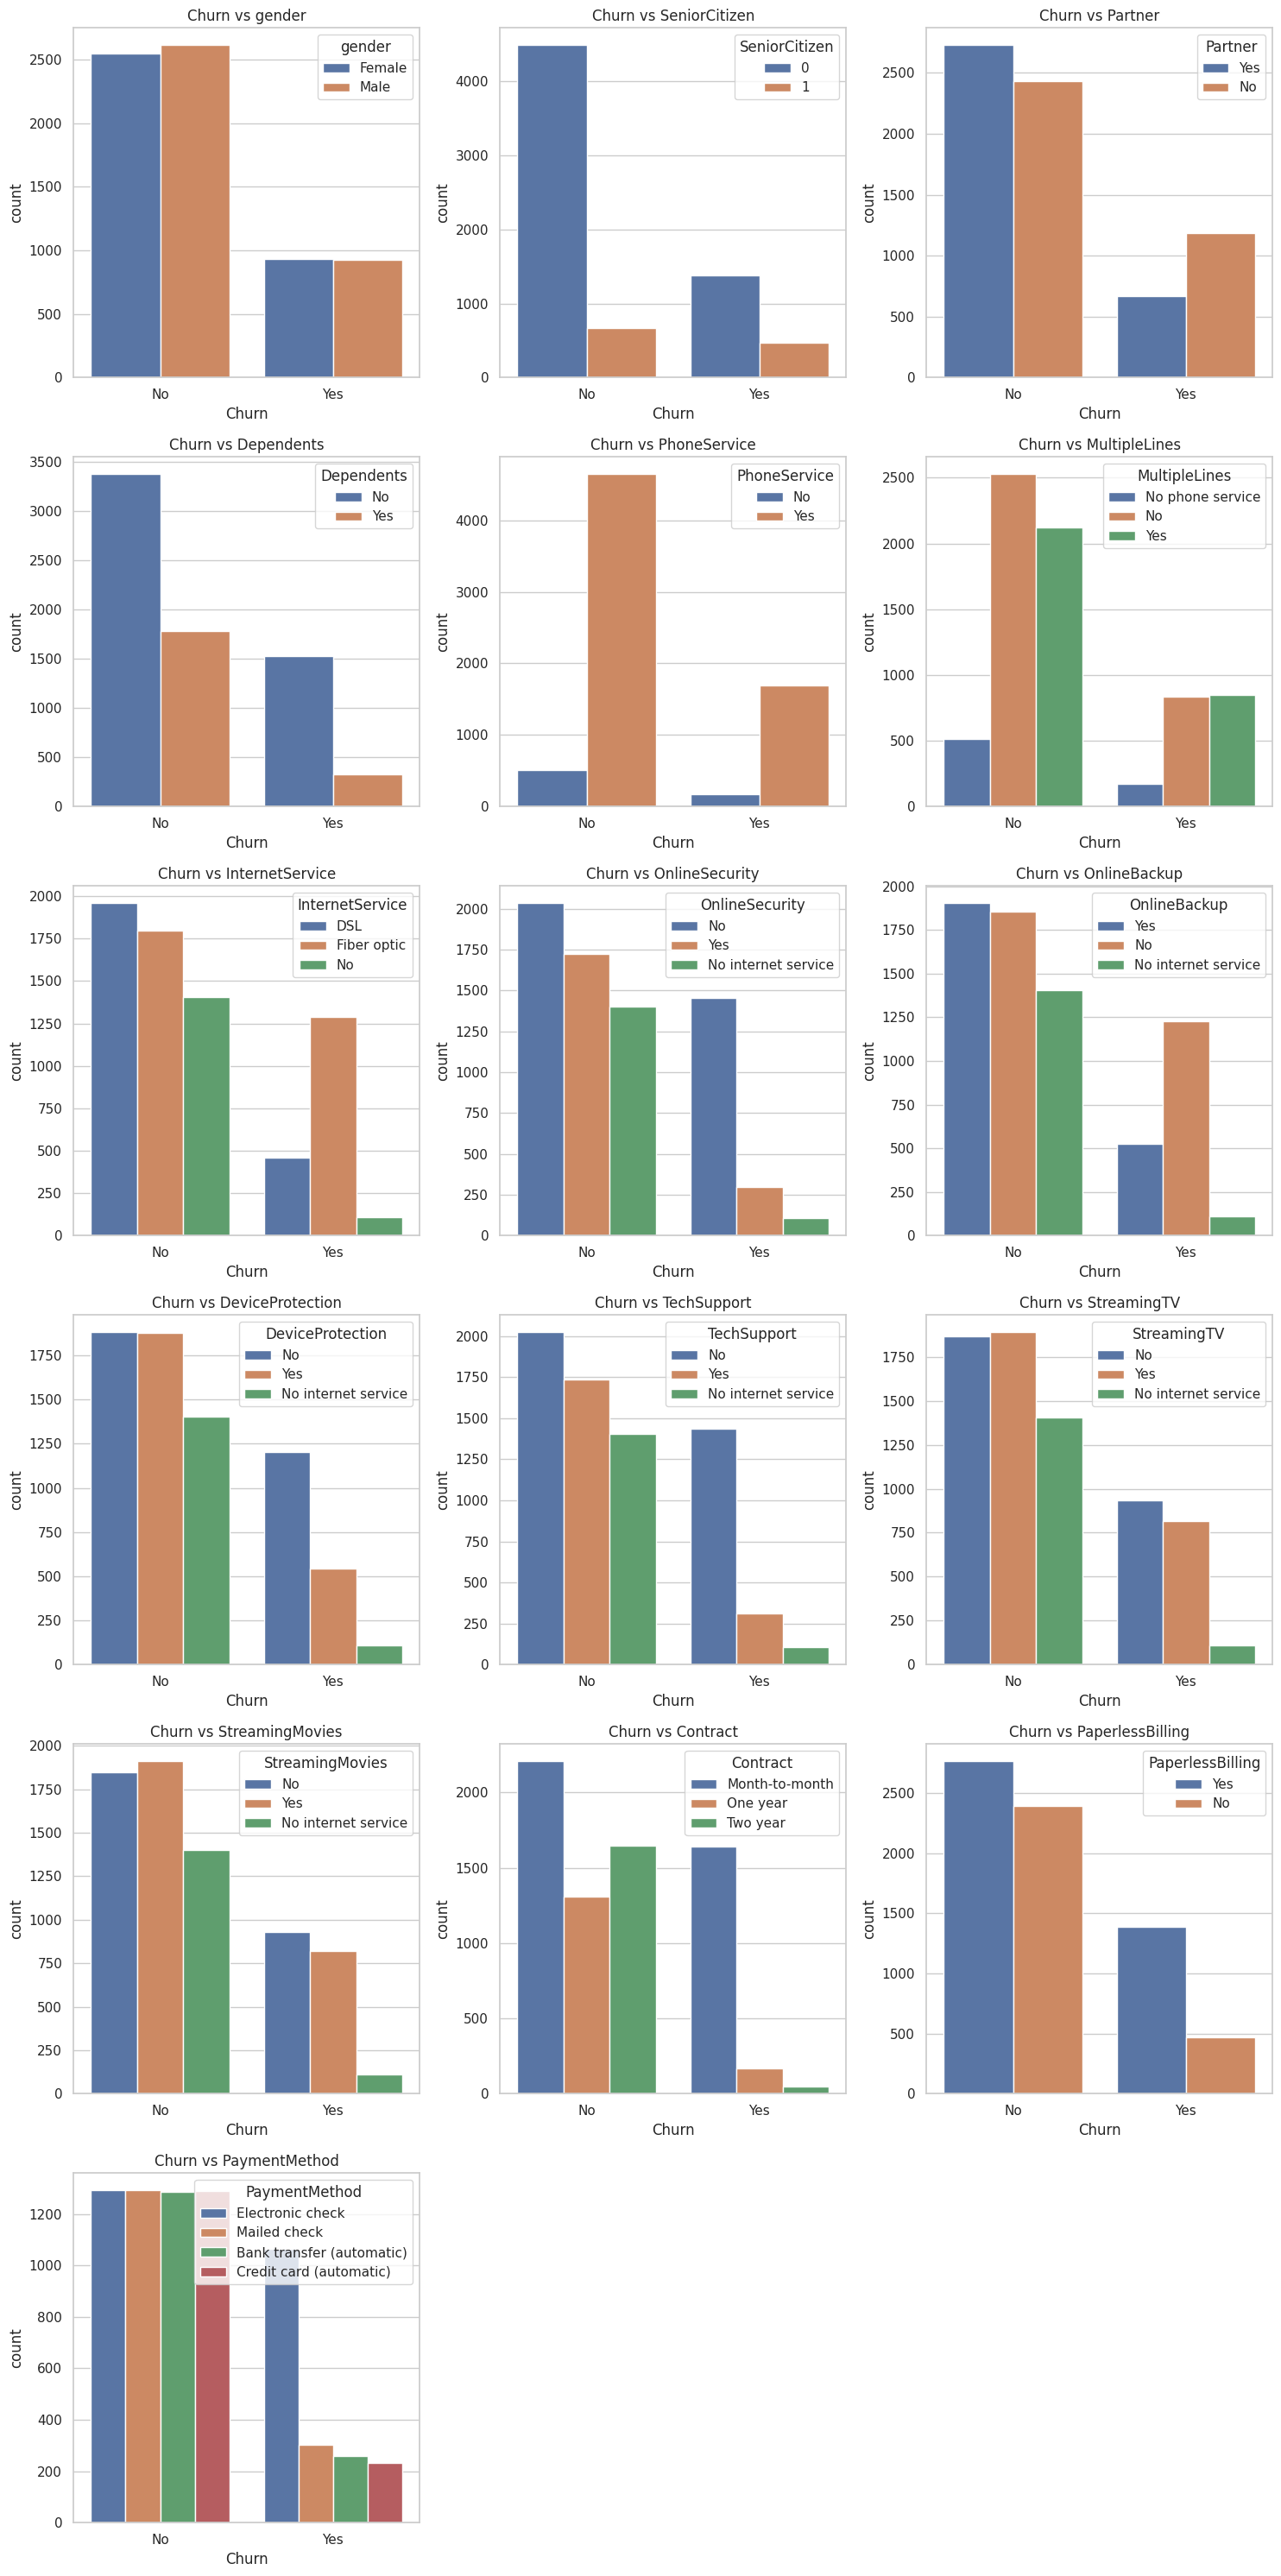

In [10]:
# --- 3. VISUALIZACIÓN (EDA) ---
import math

# Seleccionamos variables categóricas para visualizar
# Excluimos numéricas (tenure, charges) y el target
vars_to_plot = [col for col in df_telco.columns if col not in ['customerID', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']]

# Calculamos el tamaño del grid dinámicamente
n_cols = 3
n_rows = math.ceil(len(vars_to_plot) / n_cols)

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()

for i, variable in enumerate(vars_to_plot):
    if variable in df_telco.columns:
        sns.countplot(data=df_telco, x='Churn', hue=variable, ax=axes[i])
        axes[i].set_title(f"Churn vs {variable}")

# Ocultar ejes vacíos
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [11]:
# --- 4. PREPROCESAMIENTO ---
from imblearn.under_sampling import RandomUnderSampler
import category_encoders as ce

# Separamos Features (X) y Target (y)
X_telco = df_telco.drop('Churn', axis=1)
y_telco = df_telco.Churn

# 1. Balanceo de datos (Undersampling)
undersample = RandomUnderSampler(random_state=42)
X_telco_bal, y_telco_bal = undersample.fit_resample(X_telco, y_telco)

print(f"Dimensiones tras balanceo: {X_telco_bal.shape}")

# 2. Codificación (Ordinal Encoding)
# Identificamos columnas categóricas para el encoder
cat_cols = [col for col in X_telco_bal.columns if col not in ['tenure', 'MonthlyCharges', 'TotalCharges']]

encoder = ce.OrdinalEncoder(cols=cat_cols)
X_telco_encoded = encoder.fit_transform(X_telco_bal)

print("\n--- Datos Codificados ---")
display(X_telco_encoded.head())
print(X_telco_encoded.dtypes)

Dimensiones tras balanceo: (3714, 19)

--- Datos Codificados ---


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
2345,1,1,1,1,4,1,1,1,1,1,1,1,1,1,1,1,1,20.05,85.50
2259,1,1,1,2,8,1,1,1,1,1,1,1,1,1,2,2,2,20.85,161.65
5739,2,2,2,2,67,1,2,2,2,2,2,2,2,2,2,2,1,102.90,6989.70
1604,2,1,2,1,69,1,2,2,2,2,3,3,2,3,3,2,3,95.75,6511.25
4247,2,1,2,1,69,1,1,2,3,2,2,2,2,2,2,1,3,106.35,7261.75


gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges        float64
dtype: object


### 3.2. Preprocesamiento
*   **Balanceo:** Usamos `RandomUnderSampler` para equilibrar las clases (Churn vs No Churn) y evitar que el modelo ignore la clase minoritaria.
*   **Encoding:** Convertimos variables categóricas a numéricas usando `OrdinalEncoder`. Random Forest es capaz de trabajar bien con este tipo de codificación.

In [12]:
# --- 5. ENTRENAMIENTO (RANDOM FOREST) ---
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# División Train/Test
X_train_telco, X_test_telco, y_train_telco, y_test_telco = train_test_split(X_telco_encoded, y_telco_bal, test_size=0.3, random_state=42)

print(f'Train shape: {X_train_telco.shape}, Test shape: {X_test_telco.shape}')

# Instancia del modelo
rf_telco = RandomForestClassifier(random_state=42)

# GridSearch para optimizar hiperparámetros
param_grid = {
    'criterion': ['gini', 'entropy'], 
    'max_depth': [2, 3, 4, 5, 8, 10],
    'n_estimators': [50, 100] # Añadimos número de árboles
}

grid_search = GridSearchCV(rf_telco, param_grid=param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train_telco, y_train_telco)

print("\nMejores hiperparámetros:", grid_search.best_params_)
print("Mejor Score (CV):", grid_search.best_score_)

best_rf_telco = grid_search.best_estimator_

Train shape: (2599, 19), Test shape: (1115, 19)

Mejores hiperparámetros: {'criterion': 'gini', 'max_depth': 8, 'n_estimators': 100}
Mejor Score (CV): 0.7779991107158737

Mejores hiperparámetros: {'criterion': 'gini', 'max_depth': 8, 'n_estimators': 100}
Mejor Score (CV): 0.7779991107158737


### 3.3. Entrenamiento y Optimización
Usamos `GridSearchCV` para encontrar la mejor configuración del bosque:
*   **`n_estimators`**: Cantidad de árboles. Más árboles suavizan el error pero aumentan el costo computacional.
*   **`max_depth`**: Profundidad de cada árbol individual. Controla la complejidad y el overfitting.

Accuracy Train: 0.8623
Accuracy Test: 0.7614

--- Reporte de Clasificación (Test) ---
              precision    recall  f1-score   support

          No       0.79      0.74      0.76       581
         Yes       0.73      0.79      0.76       534

    accuracy                           0.76      1115
   macro avg       0.76      0.76      0.76      1115
weighted avg       0.76      0.76      0.76      1115



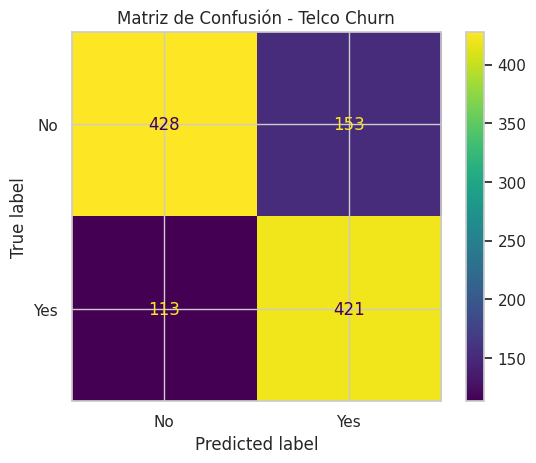

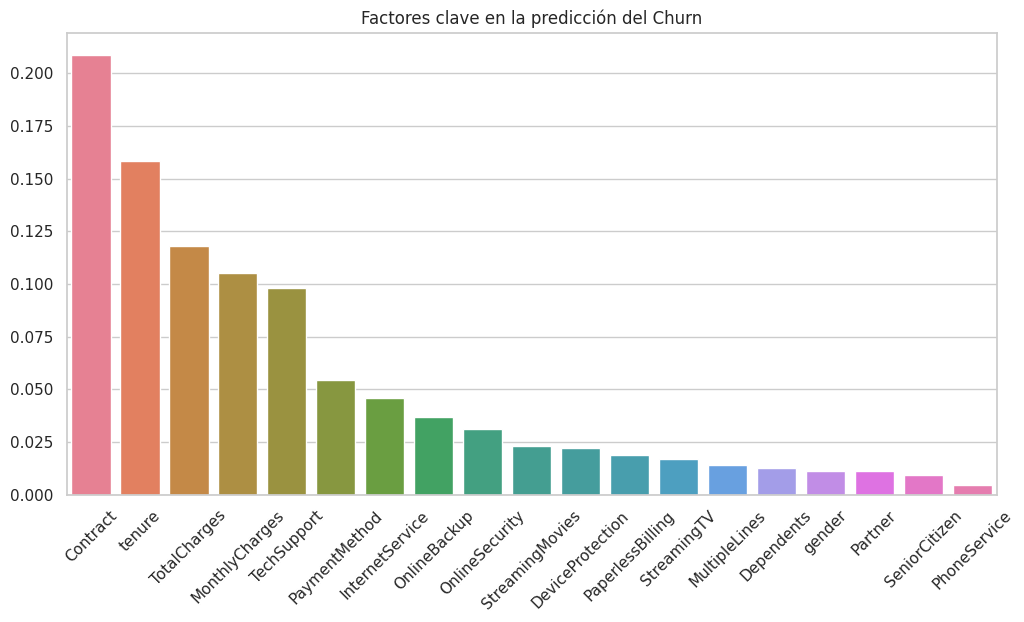

In [13]:
# --- 6. EVALUACIÓN ---
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Predicciones
y_train_pred = best_rf_telco.predict(X_train_telco)
y_test_pred = best_rf_telco.predict(X_test_telco)

# Accuracy
print(f"Accuracy Train: {accuracy_score(y_train_telco, y_train_pred):.4f}")
print(f"Accuracy Test: {accuracy_score(y_test_telco, y_test_pred):.4f}")

# Reporte
print("\n--- Reporte de Clasificación (Test) ---")
print(classification_report(y_test_telco, y_test_pred))

# Matriz de Confusión
cm = confusion_matrix(y_test_telco, y_test_pred, labels=best_rf_telco.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_rf_telco.classes_)
disp.plot()
plt.title("Matriz de Confusión - Telco Churn")
plt.show()

# Importancia de Características
feature_scores = pd.DataFrame(pd.Series(best_rf_telco.feature_importances_, index=X_train_telco.columns).sort_values(ascending=False)).T
plt.figure(figsize=(12,6))
sns.barplot(data=feature_scores)
plt.title("Factores clave en la predicción del Churn")
plt.xticks(rotation=45)
plt.show()

### 3.4. Evaluación e Interpretación
*   **Accuracy:** Precisión global.
*   **Matriz de Confusión:** Esencial para ver los Falsos Negativos (clientes que se van pero predecimos que se quedan).
*   **Feature Importance:** Random Forest nos permite cuantificar qué variables (ej. `Contract`, `TechSupport`) son las más determinantes para la predicción.

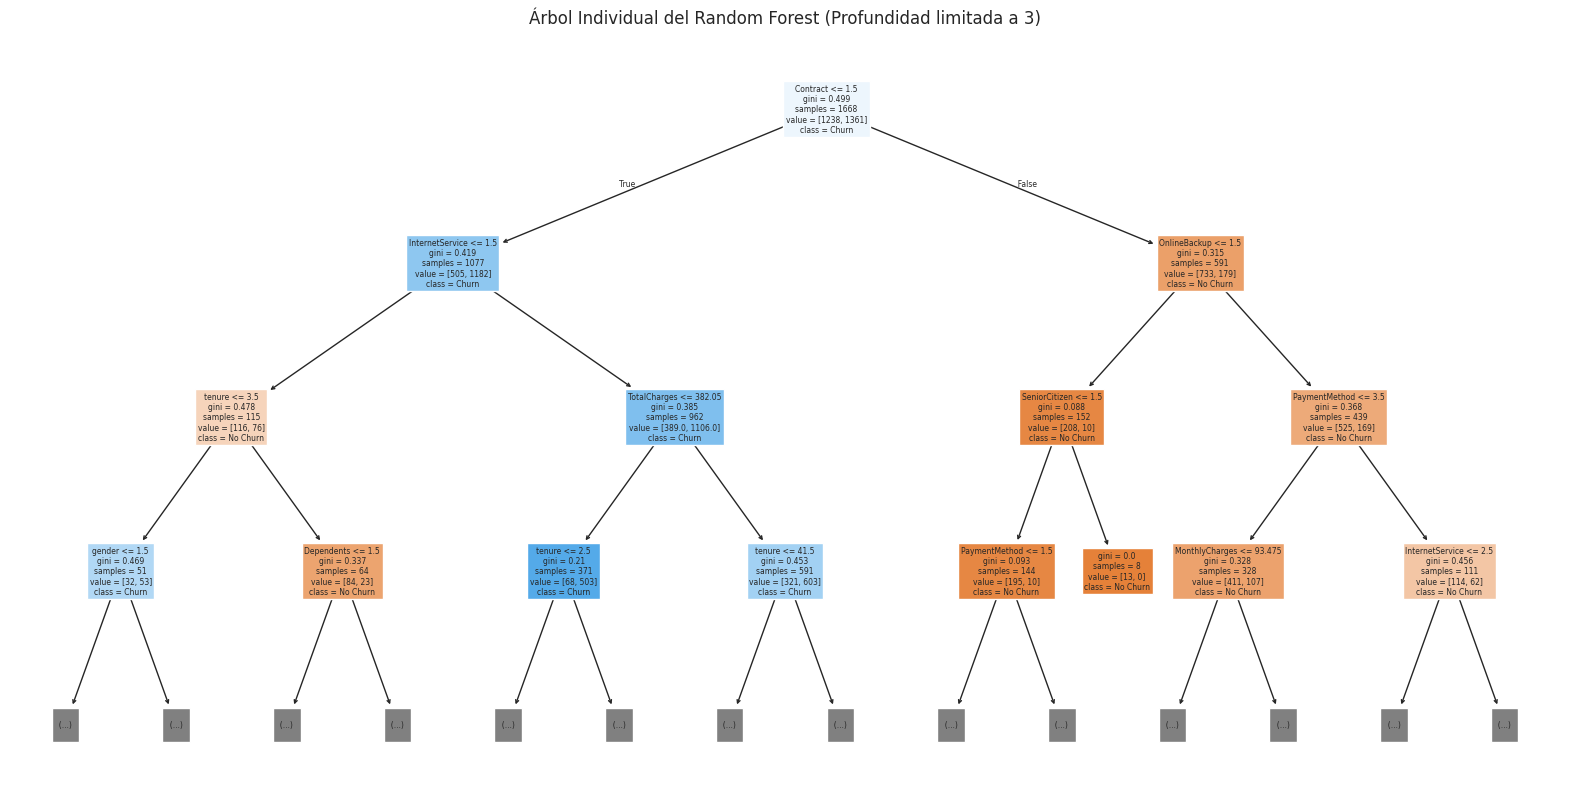

In [14]:
# --- 7. VISUALIZACIÓN DE UN ÁRBOL ---
from sklearn.tree import plot_tree

# Visualizamos uno de los árboles del bosque (ej. el primero)
if hasattr(best_rf_telco, 'estimators_'):
    single_tree = best_rf_telco.estimators_[0]
    plt.figure(figsize=(20,10))
    plot_tree(single_tree, feature_names=X_train_telco.columns, class_names=['No Churn', 'Churn'], filled=True, max_depth=3)
    plt.title("Árbol Individual del Random Forest (Profundidad limitada a 3)")
    plt.show()